In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/gemstones-images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemstones-images/test/Alexandrite/alexandrite_18.jpg
/kaggle/input/gemstones-images/test/Alexandrite/alexandrite_6.jpg
/kaggle/input/gemstones-images/test/Alexandrite/alexandrite_3.jpg
/kaggle/input/gemstones-images/test/Alexandrite/alexandrite_28.jpg
/kaggle/input/gemstones-images/test/Coral/coral_9.jpg
/kaggle/input/gemstones-images/test/Coral/coral_18.jpg
/kaggle/input/gemstones-images/test/Coral/coral_3.jpg
/kaggle/input/gemstones-images/test/Coral/coral_28.jpg
/kaggle/input/gemstones-images/test/Bixbite/bixbite_3.jpg
/kaggle/input/gemstones-images/test/Bixbite/bixbite_9.jpg
/kaggle/input/gemstones-images/test/Bixbite/bixbite_4.jpg
/kaggle/input/gemstones-images/test/Bixbite/bixbite_6.jpg
/kaggle/input/gemstones-images/test/Lapis Lazuli/lapis lazuli_28.jpg
/kaggle/input/gemstones-images/test/Lapis Lazuli/lapis lazuli_3.jpg
/kaggle/input/gemstones-images/test/Lapis Lazuli/lapis lazuli_9.jpg
/kaggle/input/gemstones-images/test/Lapis Lazuli/lapis lazuli_18.jpg
/kaggle/in

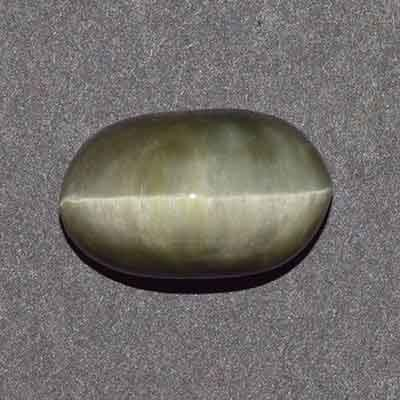

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Create train and test dir paths
train_data_dir = '/kaggle/input/gemstones-images/train'
test_data_dir = '/kaggle/input/gemstones-images/test'

img = load_img('/kaggle/input/gemstones-images/train/Cats Eye/cats eye_11.jpg')
X = img_to_array(img)

img

In [25]:
X.shape

(400, 400, 3)

In [26]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.utils import image_dataset_from_directory

In [45]:
batch_size = 64

In [46]:
train_ds = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(255, 255),
    batch_size=batch_size)

# We define a second one for the test data

val_ds = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(255, 255),
    batch_size=batch_size)

Found 2856 files belonging to 87 classes.
Found 363 files belonging to 87 classes.


In [47]:
model_v2_1 = Sequential()

model_v2_1.add(layers.Input((255, 255, 3)))
model_v2_1.add(layers.Rescaling(1./255))

model_v2_1.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model_v2_1.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model_v2_1.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model_v2_1.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model_v2_1.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"))
model_v2_1.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model_v2_1.add(layers.Flatten())

# Here we flatten our data to end up with just one dimension

model_v2_1.add(layers.Dense(64, activation="relu"))

model_v2_1.add(layers.Dropout(0.5))

model_v2_1.add(layers.Dense(87, activation="softmax"))

model_v2_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 255, 255, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       4,194,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 87)                  │           5,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,228,663 (16.13 MB)

 Trainable params: 4,228,663 (16.13 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
adam = optimizers.Adam(learning_rate = 0.001)


In [49]:
class_names = train_ds.class_names
print(class_names)

['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst', 'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green', 'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony', 'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite', 'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green', 'Onyx Red', 'Opal', 'Pearl', 'Peridot', 'Prehnite', 'Pyrite', 'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue', 'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Scapolite', 'Serpentine', 'Sodalite', 'Spessartite

In [61]:
MODEL = "model_v2_1.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [51]:
model_v2_1.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = model_v2_1.fit(
        train_ds,
        epochs=50,
        validation_data=val_ds, 
        batch_size=batch_size,
        callbacks=[modelCheckpoint,LRreducer, EarlyStopper]
        )

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.0133 - loss: 4.5730 - val_accuracy: 0.0331 - val_loss: 4.3842 - learning_rate: 0.0010
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.0260 - loss: 4.3764 - val_accuracy: 0.0634 - val_loss: 4.1649 - learning_rate: 0.0010
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.0467 - loss: 4.2130 - val_accuracy: 0.0826 - val_loss: 3.9042 - learning_rate: 0.0010
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.0707 - loss: 4.0495 - val_accuracy: 0.1405 - val_loss: 3.6986 - learning_rate: 0.0010
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.0907 - loss: 3.8245 - val_accuracy: 0.1763 - val_loss: 3.4727 - learning_rate: 0.0010
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.1109 - loss: 3.6436 - val_accuracy: 0.2259 - val_loss: 3.1141 - learning_rate: 0.0010
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.1394 - loss: 3.3719 - val_ac

In [53]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [54]:
def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()

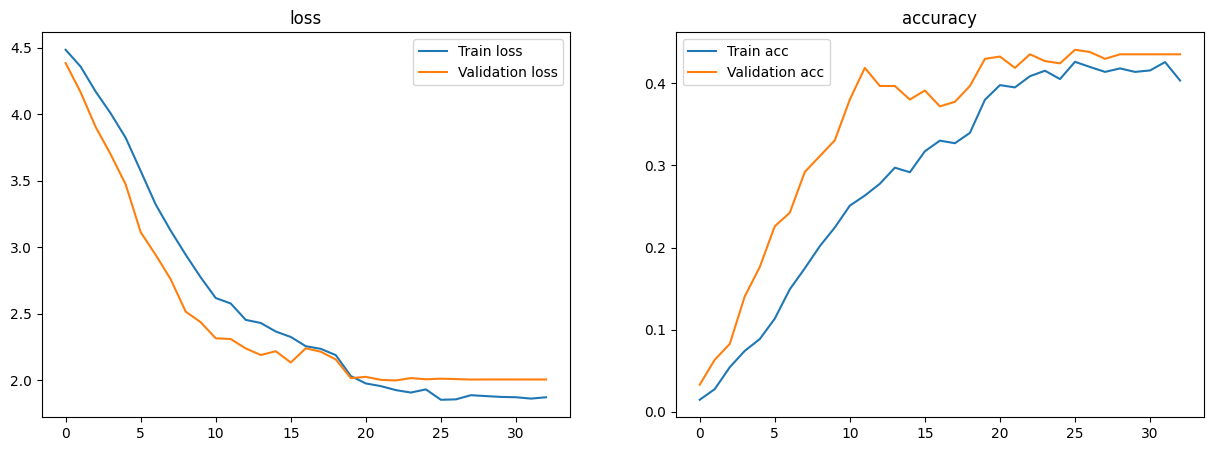

In [55]:
import numpy as np
import matplotlib.pyplot as plt

plot_history(history)

In [56]:
from tensorflow.keras.preprocessing import image

img_path = '/kaggle/input/gemstones-images/test/Cats Eye/cats eye_28.jpg'
img = image.load_img(img_path, target_size=(255, 255))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Add an extra batch dimension since the model expects batches of input
img_array = np.expand_dims(img_array, axis=0)

prediction = model_v2_1.predict(img_array)

class_names = train_ds.class_names
predicted_class = np.argmax(prediction[0])
predicted_label = class_names[predicted_class]

print(f"Predicted class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Predicted class: Cats Eye


In [60]:
from tensorflow.keras.preprocessing import image

img_path = '/kaggle/input/gemstones-images/test/Diaspore/diaspore_28.jpg'
img = image.load_img(img_path, target_size=(255, 255))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Add an extra batch dimension since the model expects batches of input
img_array = np.expand_dims(img_array, axis=0)

prediction = model_v2_1.predict(img_array)

class_names = train_ds.class_names
predicted_class = np.argmax(prediction[0])
predicted_label = class_names[predicted_class]

print(f"Predicted class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Quartz Rutilated


model with data augmentation

In [47]:
model_v2_2 = Sequential()

model_v2_2.add(layers.Input((255, 255, 3)))
model_v2_2.add(layers.Rescaling(1./255))

# Data Augmentation Layers

model_v2_2.add(layers.RandomFlip("horizontal"))
model_v2_2.add(layers.RandomZoom(0.1))
model_v2_2.add(layers.RandomTranslation(0.2, 0.2))
model_v2_2.add(layers.RandomRotation(0.1))

model_v2_2.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model_v2_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model_v2_2.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model_v2_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model_v2_2.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"))
model_v2_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model_v2_2.add(layers.Flatten())

# Here we flatten our data to end up with just one dimension

model_v2_2.add(layers.Dense(64, activation="relu"))

model_v2_2.add(layers.Dropout(0.5))

model_v2_2.add(layers.Dense(87, activation="softmax"))

model_v2_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_3 (RandomFlip)           │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_3 (RandomZoom)           │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation_3                 │ (None, 255, 255, 3)         │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_3 (RandomRotation)   │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 255, 255, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │       4,194,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 87)                  │           5,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,228,663 (16.13 MB)

 Trainable params: 4,228,663 (16.13 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
MODEL = "model_v2_2.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       verbose=0,
                                       restore_best_weights=True)

In [49]:
adam = optimizers.Adam(learning_rate=0.001)

In [50]:
model_v2_2.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history_2 = model_v2_2.fit(
        train_ds,
        epochs=50,
        validation_data=val_ds, 
        batch_size=batch_size,
        callbacks=[modelCheckpoint,LRreducer, EarlyStopper]
        )

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.0069 - loss: 4.6634 - val_accuracy: 0.0165 - val_loss: 4.4627 - learning_rate: 0.0010
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.0149 - loss: 4.4570 - val_accuracy: 0.0303 - val_loss: 4.4029 - learning_rate: 0.0010
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.0228 - loss: 4.4008 - val_accuracy: 0.0634 - val_loss: 4.2271 - learning_rate: 0.0010
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.0413 - loss: 4.2997 - val_accuracy: 0.0551 - val_loss: 4.1204 - learning_rate: 0.0010
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.0482 - loss: 4.2225 - val_accuracy: 0.0689 - val_loss: 4.0169 - learning_rate: 0.0010
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.0404 - loss: 4.1655 - val_accuracy: 0.0799 - val_loss: 3.9323 - learning_rate: 0.0010
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.0427 - loss: 4.1262 - 

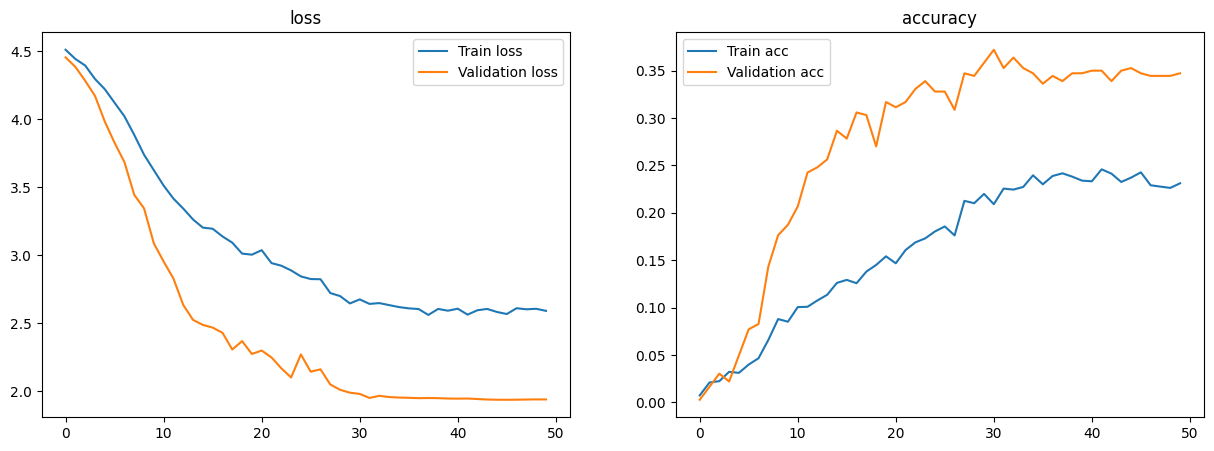

In [46]:
plot_history(history_2)

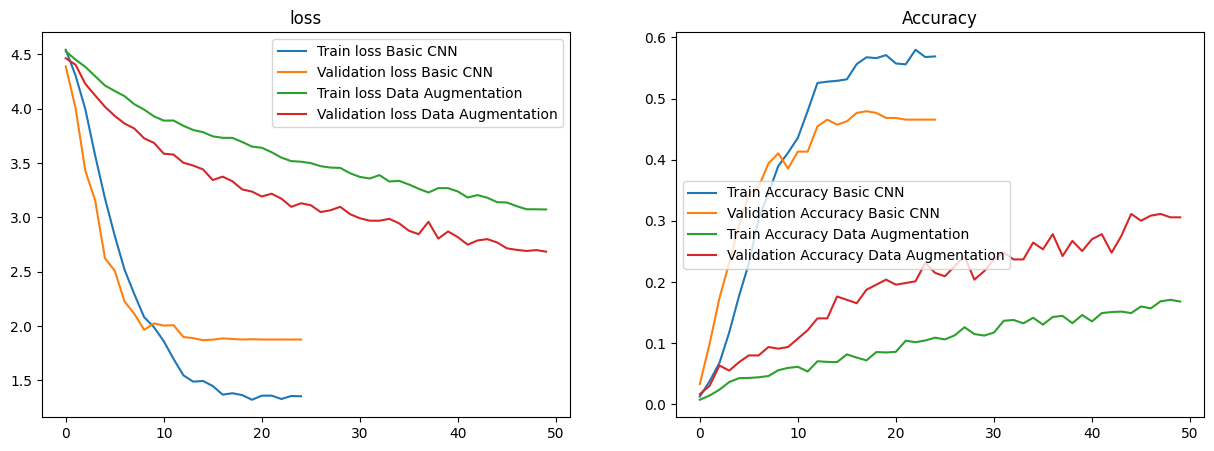

In [52]:
plot_compare_history(history, "Basic CNN", history_2, "Data Augmentation")

### Third model with ViTForImageClassification from Hugging Face, pre-trained on ImageNet

In [ ]:
data_augmentation = Sequential()

data_augmentation.add(layers.RandomFlip("horizontal"))
data_augmentation.add(layers.RandomZoom(0.1))
data_augmentation.add(layers.RandomTranslation(0.2, 0.2))
data_augmentation.add(layers.RandomRotation(0.1))

In [55]:
!pip install tensorflow transformers datasets timm

In [60]:
import tensorflow as tf
from transformers import ViTFeatureExtractor, ViTForImageClassification
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
from pathlib import Path

In [62]:
# Load model directly
from transformers import AutoImageProcessor, AutoModel

model = AutoModel.from_pretrained("google/vit-base-patch16-224-in21k")

OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like google/vit-base-patch16-224-in21k is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

In [ ]:
#specific format for ViT ... and here it begins...

def preprocess_images(images, labels):
    # Convert images to numpy array
    images = np.array([np.array(img) for img in images])
    # Normalize images
    inputs = feature_extractor(images, return_tensors="tf")
    return inputs["pixel_values"], labels

# Apply preprocessing
train_ds = train_ds.map(preprocess_images)
val_ds = val_ds.map(preprocess_images)

In [ ]:
# Convert Hugging Face ViT model to TensorFlow model
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
vit_model = tf.keras.Model(inputs=input_layer, outputs=vit_model(input_layer).logits)

# Compile the model
vit_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Train the model
vit_model.fit(train_ds, validation_data=val_ds, epochs=5)

In [ ]:
# Fine tuning Vit on gemstones... of course this is a ferrari ^^

# Convert Hugging Face ViT model to TensorFlow model
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
vit_model = tf.keras.Model(inputs=input_layer, outputs=vit_model(input_layer).logits)

# Compile the model
vit_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Train the model
vit_model.fit(train_ds, validation_data=val_ds, epochs=5)

In [ ]:
#evaluate ???

In [ ]:
import sklearn.metrics as m

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm[:30, :30])
disp.plot()
plt.xlabel('Target Class')
plt.ylabel('Output Class')
plt.show()
for i in range(86):
    print('[',i, ']' ,'[',i, ']' , '=', cm[i][i])

np.seterr(divide='ignore', invalid='ignore')
precision_mlp = np.diag(cm) / np.sum(cm, axis=1)
recall_mlp = np.diag(cm) / np.sum(cm, axis=0)

plt.figure(figsize=(8, 6))
plt.bar(range(len(precision_mlp)), precision_mlp)
plt.xlabel('Classe')
plt.ylabel('Precisão')
plt.title('MLP: Precisão por classe')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(range(len(recall_mlp)), recall_mlp)
plt.xlabel('Classe')
plt.ylabel('Sensibilidade')
plt.title('MLP: Sensibilidade por classe')
plt.show()